### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pickle import FALSE

ireland = pd.read_csv("Tasks/Task_4_Insurance/Data/Ireland.csv", index_col=0)
netherlands = pd.read_csv("Tasks/Task_4_Insurance/Data/Netherlands.csv", index_col=0)
sardinia = pd.read_csv("Tasks/Task_4_Insurance/Data/Sardinia.csv", index_col=0)
scotland = pd.read_csv("Tasks/Task_4_Insurance/Data/Scotland.csv", index_col=0)

In [3]:
sardinia.head()

,time,height,WS,WD,PD,XLAT,XLON,POWER
0,01/01/2015 00:00,100,13.519206,35.024260,1556.1812,41.3218,9.578857,4940.867574
1,01/01/2015 00:30,100,13.291739,31.094086,1479.3969,41.3218,9.578857,4926.001783
2,01/01/2015 01:00,100,12.838842,29.211823,1333.8385,41.3218,9.578857,4887.609908
3,01/01/2015 01:30,100,12.672491,26.597778,1283.2963,41.3218,9.578857,4869.914086
4,01/01/2015 02:00,100,12.559168,26.160340,1248.9700,41.3218,9.578857,4856.551109


In [4]:
ireland["TIME"] = pd.to_datetime(ireland["TIME"])
netherlands["TIME"] = pd.to_datetime(netherlands["TIME"])
sardinia["TIME"] = pd.to_datetime(sardinia["time"])
scotland["TIME"] = pd.to_datetime(scotland["TIME"])

In [40]:
ireland["DAY"] = ireland["TIME"].dt.date
netherlands["DAY"] = netherlands["TIME"].dt.date
sardinia["DAY"] = sardinia["TIME"].dt.date
scotland["DAY"] = scotland["TIME"].dt.date

In [41]:
ireland.head()

,TIME,HGT,WS,WD,PD,XLAT,XLON,POWER,IsLossEvent,DAY
0,2015-01-01 00:00:00,100,14.701463,208.66410,1975.4340,53.231453,-10.01477,4987.424050,False,2015-01-01
1,2015-01-01 00:30:00,100,14.701601,206.70175,1975.2759,53.231453,-10.01477,4987.427378,False,2015-01-01
2,2015-01-01 01:00:00,100,14.981335,205.01984,2089.9133,53.231453,-10.01477,4993.491767,False,2015-01-01
3,2015-01-01 01:30:00,100,15.147255,202.35155,2160.3105,53.231453,-10.01477,4996.513182,False,2015-01-01
4,2015-01-01 02:00:00,100,15.860322,199.94739,2479.6287,53.231453,-10.01477,5005.846838,False,2015-01-01


In [42]:
ireland.dtypes

TIME           datetime64[ns]
HGT                     int64
WS                    float64
WD                    float64
PD                    float64
XLAT                  float64
XLON                  float64
POWER                 float64
IsLossEvent              bool
DAY                    object
dtype: object

In [7]:
ireland.head()

,TIME,HGT,WS,WD,PD,XLAT,XLON,POWER
0,2015-01-01 00:00:00,100,14.701463,208.66410,1975.4340,53.231453,-10.01477,4987.424050
1,2015-01-01 00:30:00,100,14.701601,206.70175,1975.2759,53.231453,-10.01477,4987.427378
2,2015-01-01 01:00:00,100,14.981335,205.01984,2089.9133,53.231453,-10.01477,4993.491767
3,2015-01-01 01:30:00,100,15.147255,202.35155,2160.3105,53.231453,-10.01477,4996.513182
4,2015-01-01 02:00:00,100,15.860322,199.94739,2479.6287,53.231453,-10.01477,5005.846838


In [8]:
ireland.shape

(17520, 8)

In [9]:
ireland.describe()

,HGT,WS,WD,PD,XLAT,XLON,POWER
count,17520.0,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.00000,17520.000000
mean,100.0,10.950619,223.654941,1525.530005,5.323145e+01,-10.01477,3117.929838
std,0.0,5.697234,78.165723,2167.778232,7.105630e-15,0.00000,1967.048187
min,100.0,0.044587,0.053650,0.000055,5.323145e+01,-10.01477,0.000000
25%,100.0,6.663771,180.722463,184.026345,5.323145e+01,-10.01477,977.610305
50%,100.0,10.269514,234.906450,669.320405,5.323145e+01,-10.01477,4067.123182
75%,100.0,14.513006,278.717707,1885.023550,5.323145e+01,-10.01477,4974.454599
max,100.0,30.422910,359.984860,16848.640000,5.323145e+01,-10.01477,5018.334971


In [10]:
(ireland.isna())

,TIME,HGT,WS,WD,PD,XLAT,XLON,POWER
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
17515,False,False,False,False,False,False,False,False
17516,False,False,False,False,False,False,False,False
17517,False,False,False,False,False,False,False,False
17518,False,False,False,False,False,False,False,False


In [11]:
ireland["IsLossEvent"] = ireland["WS"] <= 3

In [12]:
sum(ireland["WS"] < 3) / ireland.shape[0]

0.05405251141552511

In [60]:
def get_loss_durations(arr) :
    s = ''.join( ['0' if i <= 3 else '1' for i in arr] )
    parts = s.split('0')
    return [len(p) for p in parts if len(p) > 0]

In [61]:
np.mean(get_loss_durations(ireland["WS"]))

128.47286821705427

In [13]:
ireland.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17510, 17511, 17512, 17513, 17514, 17515, 17516, 17517, 17518,
            17519],
           dtype='int64', length=17520)

In [70]:
sardinia.head()

,time,height,WS,WD,PD,XLAT,XLON,POWER,TIME,DAY
0,01/01/2015 00:00,100,13.519206,35.024260,1556.1812,41.3218,9.578857,4940.867574,2015-01-01 00:00:00,2015-01-01
1,01/01/2015 00:30,100,13.291739,31.094086,1479.3969,41.3218,9.578857,4926.001783,2015-01-01 00:30:00,2015-01-01
2,01/01/2015 01:00,100,12.838842,29.211823,1333.8385,41.3218,9.578857,4887.609908,2015-01-01 01:00:00,2015-01-01
3,01/01/2015 01:30,100,12.672491,26.597778,1283.2963,41.3218,9.578857,4869.914086,2015-01-01 01:30:00,2015-01-01
4,01/01/2015 02:00,100,12.559168,26.160340,1248.9700,41.3218,9.578857,4856.551109,2015-01-01 02:00:00,2015-01-01


In [39]:
ireland.loc[5, "TIME"].dt.date

AttributeError: 'Timestamp' object has no attribute 'dt'

In [ ]:
def getListOfLossIntervalLengths(inputData):
    resultList = list()
    resultDateList = list()
    index_max = inputData.shape[0]
    for index in inputData.index:
        if (inputData.loc[index, "POWER"] == 0):
            if (inputData.loc[index - 1, "POWER"] == 0):
                next
            else:
                resultDateList.append(inputData.loc[index, "DAY"])
                count = 1
                index_while = index + 1
                if index_while == index_max:
                        break
                while (inputData.loc[index_while, "POWER"] <= 3):
                    count += 1
                    index_while += 1
                    if index_while == index_max:
                        break
                resultList.append(count*2)
    return [resultDateList, resultList]
                

        


In [ ]:
4 < ireland.shape[0]

In [ ]:
sardinia.head()

In [ ]:
result_ireland = getListOfLossIntervalLengths(ireland)
result_netherlands = getListOfLossIntervalLengths(netherlands)
result_sardinia = getListOfLossIntervalLengths(sardinia)
result_scotland = getListOfLossIntervalLengths(scotland)

In [ ]:
result_ireland

In [ ]:
ireland.head()

In [ ]:
print(len(result_ireland[0]))
print(len(result_netherlands[0]))
print(len(result_sardinia[0]))
print(len(result_scotland[0]))

In [ ]:
np.percentile(np.asarray(result_ireland[1]), 80)

In [ ]:
np.percentile(np.asarray(result_netherlands[1]), 80)

In [ ]:
np.percentile(np.asarray(result_sardinia[1]), 80)

In [ ]:
np.percentile(np.asarray(result_scotland[1]), 80)

In [ ]:
print(np.mean(result_ireland[1]))
print(np.mean(result_netherlands[1]))
print(np.mean(result_sardinia[1]))
print(np.mean(result_scotland[1]))

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax2 = fig.add_subplot(213)
ax2 = fig.add_subplot(214)

ax1.loglog(x, y1)
ax2.loglog(x, y2)

# Set common labels
fig.text(0.5, 0.04, 'common xlabel', ha='center', va='center')
fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

ax1.set_title('ax1 title')
ax2.set_title('ax2 title')

plt.savefig('common_labels_text.png', dpi=300)

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(result_ireland[0], result_ireland[1])
axs[0, 1].scatter(result_netherlands[0], result_netherlands[1])
axs[1, 0].scatter(result_sardinia[0], result_sardinia[1])
axs[1, 1].scatter(result_scotland[0], result_scotland[1])
axs[0, 0].set_ylim([0, 150])
axs[0, 1].set_ylim([0, 150])
axs[1, 0].set_ylim([0, 150])
axs[1, 1].set_ylim([0, 150])
axs[0, 0].set_title("Losses Ireland (Offshore)")
axs[0, 1].set_title("Losses Netherlands (Onshore)")
axs[1, 0].set_title("Losses Sardinia (Offshore)")
axs[1, 1].set_title("Losses Scotland (Onshore)")
fig.set_size_inches(15, 8)
plt.xlabel("Date")
plt.setp(axs[-1, :], xlabel='Date')
plt.setp(axs[:, 0], ylabel='Loss Duration (in hours)')
plt.savefig("LossPeriods.png", format="png", dpi=1200)
plt.show()

In [130]:
np.percentile(np.asarray(result_ireland[1]), 80)

24.0

In [141]:
np.percentile(np.asarray(result_netherlands[1]), 80)

30.0

In [132]:
np.percentile(np.asarray(result_sardinia[1]), 80)

36.0

In [142]:
np.percentile(np.asarray(result_scotland[1]), 80)

22.0

In [116]:
print(np.mean(result_ireland[1]))
print(np.mean(result_netherlands[1]))
print(np.mean(result_sardinia[1]))
print(np.mean(result_scotland[1]))

16.21761658031088
15.942857142857143
25.207272727272727
15.564516129032258


In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax2 = fig.add_subplot(213)
ax2 = fig.add_subplot(214)

ax1.loglog(x, y1)
ax2.loglog(x, y2)

# Set common labels
fig.text(0.5, 0.04, 'common xlabel', ha='center', va='center')
fig.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')

ax1.set_title('ax1 title')
ax2.set_title('ax2 title')

plt.savefig('common_labels_text.png', dpi=300)

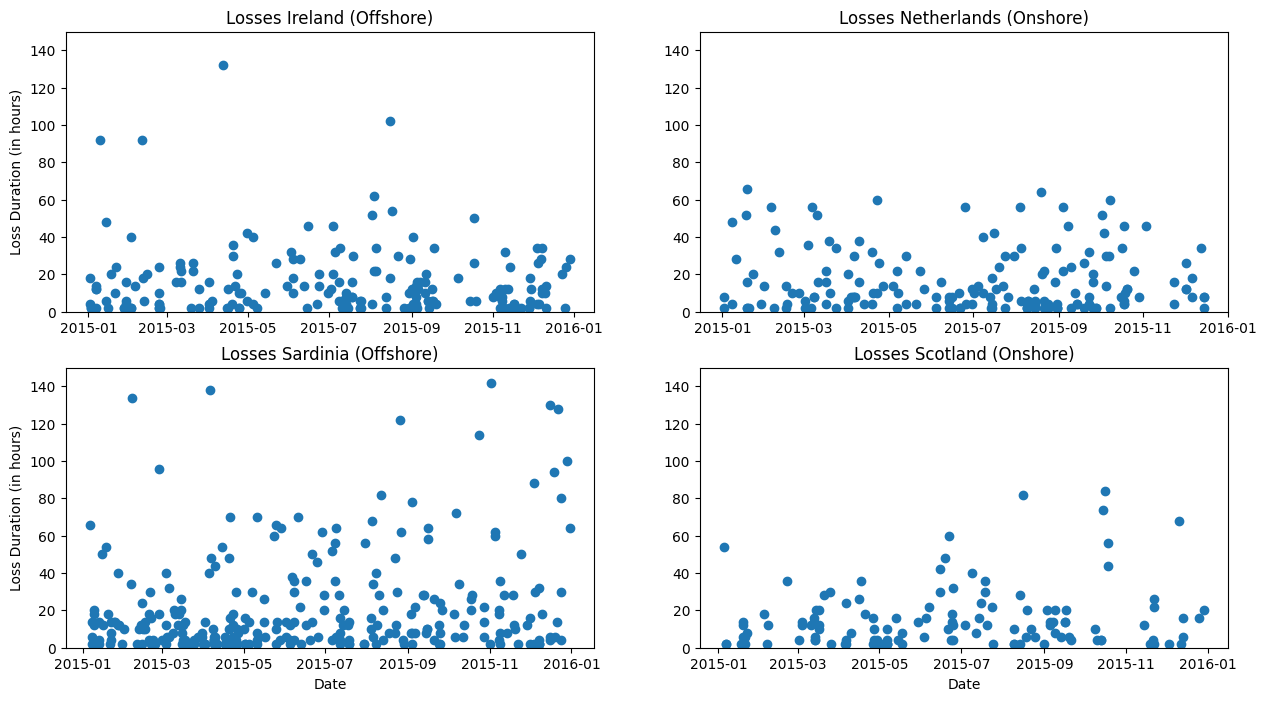

In [147]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(result_ireland[0], result_ireland[1])
axs[0, 1].scatter(result_netherlands[0], result_netherlands[1])
axs[1, 0].scatter(result_sardinia[0], result_sardinia[1])
axs[1, 1].scatter(result_scotland[0], result_scotland[1])
axs[0, 0].set_ylim([0, 150])
axs[0, 1].set_ylim([0, 150])
axs[1, 0].set_ylim([0, 150])
axs[1, 1].set_ylim([0, 150])
axs[0, 0].set_title("Losses Ireland (Offshore)")
axs[0, 1].set_title("Losses Netherlands (Onshore)")
axs[1, 0].set_title("Losses Sardinia (Offshore)")
axs[1, 1].set_title("Losses Scotland (Onshore)")
fig.set_size_inches(15, 8)
plt.xlabel("Date")
plt.setp(axs[-1, :], xlabel='Date')
plt.setp(axs[:, 0], ylabel='Loss Duration (in hours)')
plt.savefig("LossPeriods.png", format="png", dpi=1200)
plt.show()

In [20]:
listInterval = list()

In [25]:
for index in ireland.index:
    if(ireland.loc[index, "POWER"] == 0):
        if (ireland.loc[index - 1])

power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
power
powe

In [ ]:
for index in ireland.index:
    if (ireland)

In [19]:
getListOfLossIntervalLengths(ireland)   

[]